### Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score, accuracy_score

### Loading Data

In [2]:
#read the dataset
data = pd.read_csv('Fraud.csv')
print(data.shape)

(6362620, 11)


### Basic Analysis

In [34]:
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# describe some statistic
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
#correlation of the variables
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

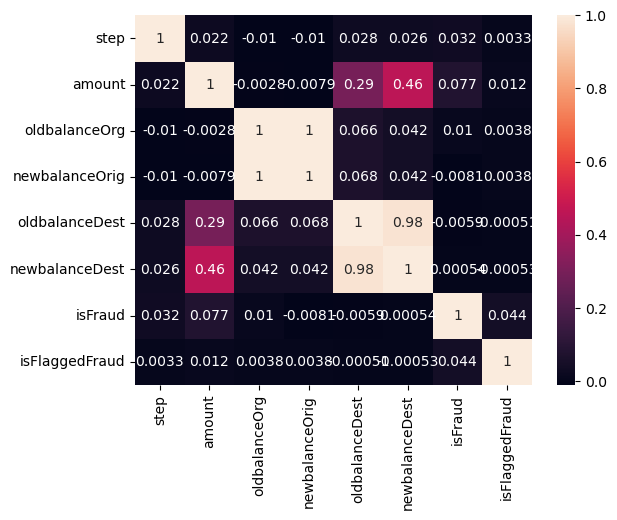

In [8]:
sns.heatmap(data.corr(),annot =True)

### Preprocessing


0    6354407
1       8213
Name: isFraud, dtype: int64


([<matplotlib.patches.Wedge at 0x20001d1f9a0>,
 [Text(-1.099990955625572, 0.004460666087110192, '0'),
  Text(1.0999909559371663, -0.004460589247970448, '1')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.871%'),
  Text(0.599995066874818, -0.002433048680711153, '0.129%')])

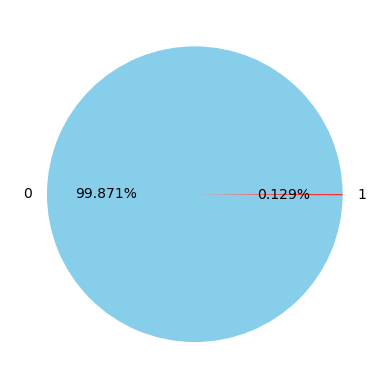

In [9]:
# frequency of legit and fraud transactions
print(data.isFraud.value_counts())
plt.pie(data["isFraud"].value_counts(),labels=data["isFraud"].unique(),autopct='%1.3f%%', colors=['skyblue','red'])

In [10]:
#creating a copy of original dataset to train and test models

new_df=data.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
num_list = new_df.select_dtypes(exclude="object").columns
print(num_list)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [12]:
# Multicollinearity - Check variance inflation factor
# Create a DataFrame to hold VIF results
vif_data = pd.DataFrame()
vif_data["feature"] = num_list
vif_data["VIF"] = [variance_inflation_factor(new_df[num_list].values, i) for i in range(len(num_list))]
print(vif_data)

          feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


In [13]:
# oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Also, oldbalanceDest and newbalanceDest.
# Thus combine these pairs of collinear attributes and drop the individual ones
new_df["actual_amt_orig"]=new_df["oldbalanceOrg"]-new_df["newbalanceOrig"]
new_df["actual_amt_orig"].describe()

count    6.362620e+06
mean    -2.123056e+04
std      1.466433e+05
min     -1.915268e+06
25%      0.000000e+00
50%      0.000000e+00
75%      1.015044e+04
max      1.000000e+07
Name: actual_amt_orig, dtype: float64

In [14]:
new_df["actual_amt_dest"]=new_df["newbalanceDest"]-new_df["oldbalanceDest"] 
new_df["actual_amt_dest"].describe()

count    6.362620e+06
mean     1.242947e+05
std      8.129391e+05
min     -1.306083e+07
25%      0.000000e+00
50%      0.000000e+00
75%      1.491054e+05
max      1.056878e+08
Name: actual_amt_dest, dtype: float64

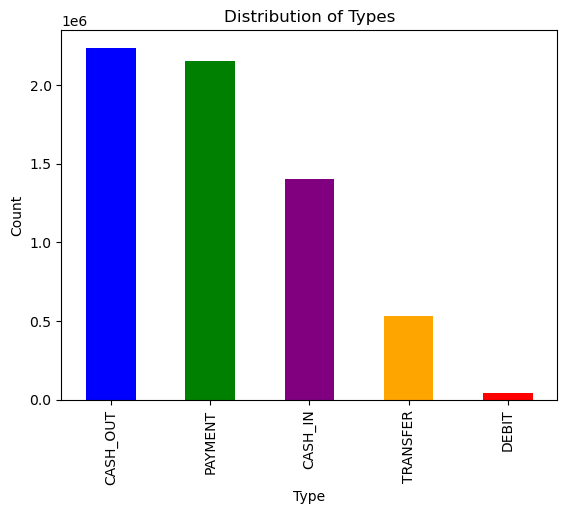

In [15]:
new_df["type"].value_counts().plot(kind='bar', color=['blue', 'green', 'purple','orange',  'red'])

# Adding labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Types')

plt.show()

In [16]:
# check if the receiver a merchant (M) or customer (C)
new_df["reciever_type"]=[i[0:1] for i in new_df["nameDest"]]
new_df["reciever_type"].value_counts()

C    4211125
M    2151495
Name: reciever_type, dtype: int64

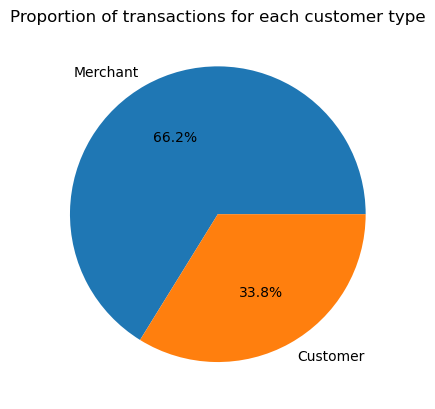

In [17]:
plt.pie(new_df["reciever_type"].value_counts(), labels=["ant","Customer"],autopct='%1.1f%%')
plt.title("Proportion of transactions for each customer type")
plt.show()

In [18]:
# check if the payer a merchant (M) or customer (C)
new_df["payer_type"]=[i[0:1] for i in new_df["nameOrig"]]
new_df["payer_type"].value_counts()

C    6362620
Name: payer_type, dtype: int64

In [19]:
todrop=["nameDest",
        "nameOrig",
        "oldbalanceOrg",
        "newbalanceOrig",
        "newbalanceDest",
        "oldbalanceDest",
        "payer_type", #this is a zero variance feature
        "isFlaggedFraud"]
new_df.drop(columns=todrop, inplace=True)
new_df.head()

,step,type,amount,isFraud,actual_amt_orig,actual_amt_dest,reciever_type
0,1,PAYMENT,9839.64,0,9839.64,0.0,M
1,1,PAYMENT,1864.28,0,1864.28,0.0,M
2,1,TRANSFER,181.00,1,181.00,0.0,C
3,1,CASH_OUT,181.00,1,181.00,-21182.0,C
4,1,PAYMENT,11668.14,0,11668.14,0.0,M


In [20]:
# Checking for dtype: object attributes
categ_list = new_df.select_dtypes(include = "object").columns
print(categ_list)

Index(['type', 'reciever_type'], dtype='object')


In [21]:
# encoding categorical values
le = LabelEncoder()
for i in categ_list:
    new_df[i] = le.fit_transform(new_df[i].astype(str))

In [22]:
new_df.head()

,step,type,amount,isFraud,actual_amt_orig,actual_amt_dest,reciever_type
0,1,3,9839.64,0,9839.64,0.0,1
1,1,3,1864.28,0,1864.28,0.0,1
2,1,4,181.00,1,181.00,0.0,0
3,1,1,181.00,1,181.00,-21182.0,0
4,1,3,11668.14,0,11668.14,0.0,1


<AxesSubplot:>

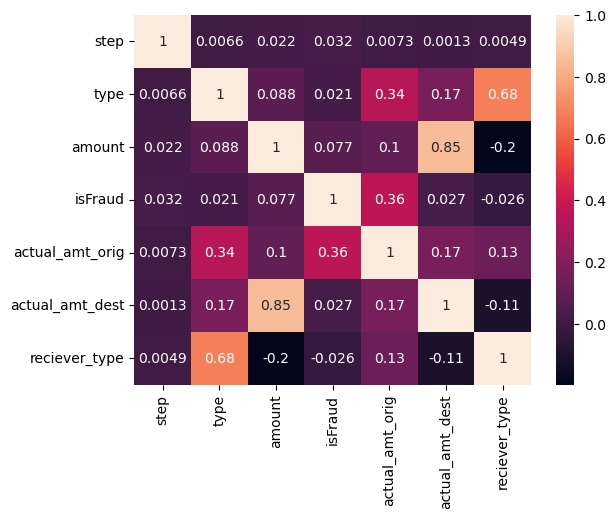

In [23]:
sns.heatmap(new_df.corr(),annot =True)

In [24]:
# Since amount and actual_Amt_dest are highly correlated to each other, we have to remove one of them to avoid overfitting
new_df.drop(columns=["actual_amt_dest"],inplace=True)

In [25]:
new_df.head()

,step,type,amount,isFraud,actual_amt_orig,reciever_type
0,1,3,9839.64,0,9839.64,1
1,1,3,1864.28,0,1864.28,1
2,1,4,181.00,1,181.00,0
3,1,1,181.00,1,181.00,0
4,1,3,11668.14,0,11668.14,1


### Model Building

In [ ]:
x = new_df.drop(columns="isFraud")
y = pd.Series([1 if new_df.loc[i, "amount"] > 200000 else new_df.loc[i, "isFraud"] for i in range(len(new_df))])

In [ ]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

### Model training

In [ ]:
forest=RandomForestClassifier(n_estimators=100,class_weight='balanced',criterion='entropy',random_state=42)
forest.fit(x_train,y_train)

In [ ]:
def illegal_transac(amount, model_prediction):
    if amount > 200000:
        return 1  # Fraud
    else:
        return model_prediction
y_hat=[illegal_transac(amount, pred) for amount, pred in zip(x_test['amount'], forest.predict(x_test))]

### Evaluation metrics

In [ ]:
print(classification_report(y_test, y_hat))

In [ ]:
# confusion matrix
con_mat=confusion_matrix(y_test, y_hat)
class_names = 'NP'
sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Probability estimates for the positive class
y_probs = forest.predict_proba(x_test)[:, 1] 

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='Isolation Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()